## Lab-2.1: Multi-variable neural-network regression 

In this lab we perform multi-variable regression with a dense feed forward ANN on the Boston housing data-set using Keras. 
  
**Submission:**

* You need to upload ONE document to Canvas when you are done
  * (1) A PDF (or HTML) of the completed form of this notebook 
* The final uploaded version should NOT have any code-errors present 
* All outputs must be visible in the uploaded version, including code-cell outputs, images, graphs, etc

**Instructions** 

* Code regression using a deep feed forward fully connected Neural network
  * Use a dense feed forward ANN model
  * **You only need to do this week's example with Keras (i.e. no PyTorch)**
  * Normalize the data as needed
  * Visualize the results at the end where possible
  * Partition data into training, validation, and test
  * Monitor training and validation throughout training by plotting
  * Print training, validation, and test errors at the very end
  * You `MUST` use early stopping: [click here](https://keras.io/api/callbacks/early_stopping/)
  * Do `MANUAL` hyper parameter tuning to try to achieve an optimal fit model
    * i.e. best training/validation loss without over-fitting
    * Explore L1 and L2 regularization and dropout
    * Explore different optimizers 
    * Use the loss functions specified in the textbook
    * Explore different options for activation functions, network size/depth, etc
* **Document what is going on in the code, as needed, with narrative markdown text between cells.**
* *Submit the version with hyper parameters that provide the optimal fit*
  * i.e. you don't need to show the outputs of your hyper-parameter tuning process
  
**Reference: The Keras portion of this assignment is included as an example in the text book**

  * See the textbook (Chollet chapter-3, page 85) for reference 


In [1]:
from keras.datasets import boston_housing
from sklearn.preprocessing import StandardScaler
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [2]:
#normalize data
scaler = StandardScaler()
train_data = scaler.fit_transform(x_train)
test_data = scaler.transform(x_test)

In [3]:
#print first 5 rows of training data
print(train_data[:5])

[[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
   0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
   0.8252202 ]
 [-0.40342651  2.99178419 -1.33391162 -0.25683275 -1.21518188  1.89434613
  -1.91036058  1.24758524 -0.85646254 -0.34843254 -1.71818909  0.43190599
  -1.32920239]
 [ 0.1249402  -0.48361547  1.0283258  -0.25683275  0.62864202 -1.82968811
   1.11048828 -1.18743907  1.67588577  1.5652875   0.78447637  0.22061726
  -1.30850006]
 [-0.40149354 -0.48361547 -0.86940196 -0.25683275 -0.3615597  -0.3245576
  -1.23667187  1.10717989 -0.51114231 -1.094663    0.78447637  0.44807713
  -0.65292624]
 [-0.0056343  -0.48361547  1.0283258  -0.25683275  1.32861221  0.15364225
   0.69480801 -0.57857203  1.67588577  1.5652875   0.78447637  0.3898823
   0.26349695]]


In [4]:
#print first 5 target values
print(y_train[:5])

[15.2 42.3 50.  21.1 17.7]


In [5]:
#partition data into training, validation, and test sets
num_validation_samples = int(0.2 * len(train_data))
val_data = train_data[:num_validation_samples]
val_targets = y_train[:num_validation_samples]
partial_train_data = train_data[num_validation_samples:]
partial_train_targets = y_train[num_validation_samples:]

#print the shape of train, test, and validation data
print("train_data shape: ", train_data.shape)
print("test_data shape: ", test_data.shape)
print("val_data shape: ", val_data.shape)

train_data shape:  (404, 13)
test_data shape:  (102, 13)
val_data shape:  (80, 13)


In [6]:
from tensorflow.keras import models, layers, regularizers

#unregularized model
def build_model():
    model = models.Sequential() #linear stack of layers
    model.add(layers.Dense(64, activation='relu',
                            input_shape=(train_data.shape[1],))) #input shape is the number of features
    model.add(layers.Dense(64, activation='relu'))#relu is the rectified linear unit function
    model.add(layers.Dense(1)) #no activation function for a regression model
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae']) #mean squared error loss function, mse specified on page 86 of textbook
    return model


# Building a Baseline 

In [7]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=25) #stop training when the validation loss stops decreasing per assignment requirements

model = build_model()
history = model.fit(partial_train_data, partial_train_targets, epochs=250, validation_data=(val_data, val_targets), callbacks=[early_stopping], batch_size=1, verbose=0)


# Final Model

In [8]:
#model with L2 regularization and dropout
def build_model_tuned():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', 
                           kernel_regularizer=regularizers.l2(0.001), 
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dropout(0.25))
    model.add(layers.Dense(64, activation='relu', 
                           kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.25))
    model.add(layers.Dense(1))
    model.compile(optimizer='adam', loss='mse', metrics=['mae']) #mse specified on page 86 of textbook
    return model


In [9]:
final_model = build_model_tuned()
final_hist = final_model.fit(train_data, y_train, epochs=250, batch_size=16, verbose=0, validation_split=0.2)
test_mse_score, test_mae_score = final_model.evaluate(test_data, y_test)
print(f'Test MSE: {test_mse_score}, Test MAE: {test_mae_score}')


4/4 [==============================] - 0s 1ms/step - loss: 20.8253 - mae: 2.9036
Test MSE: 20.825305938720703, Test MAE: 2.90364670753479


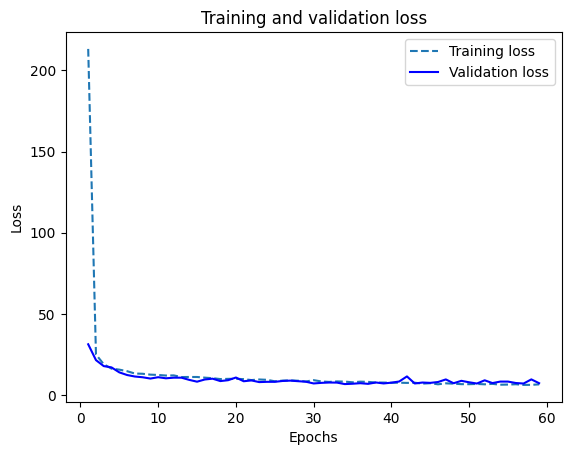

In [10]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure()
plt.plot(epochs, loss, '--', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


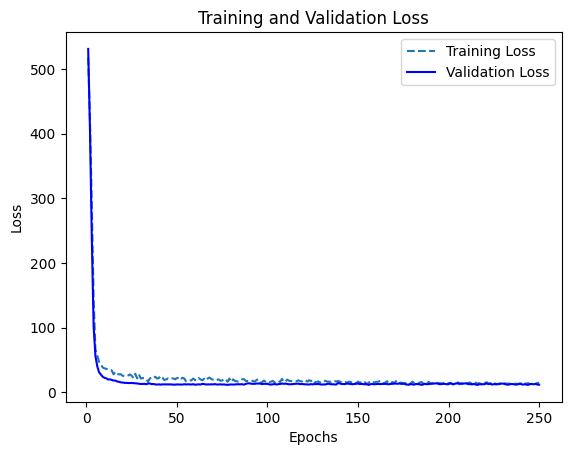

In [11]:
loss = final_hist.history['loss']
val_loss = final_hist.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure()
plt.plot(epochs, loss, '--', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


4/4 [==============================] - 0s 669us/step


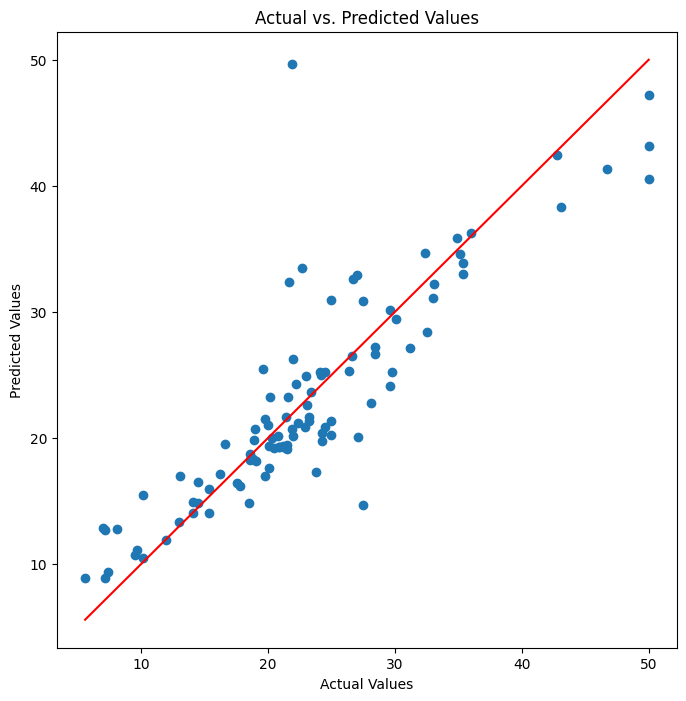

In [14]:
import matplotlib.pyplot as plt

#get predictions
test_predictions = final_model.predict(test_data).flatten()

#actual vs. predicted values
plt.figure(figsize=(8, 8))
plt.scatter(y_test, test_predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  #ideal line where predicted = actual
plt.show()
